In [123]:
!pip install wandb

In [124]:

import numpy as np
import pandas as pd
import wandb
import matplotlib.colors
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [125]:
!wandb login 17d991db26320e751b170877037d1067a164fe6d

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\asus/.netrc


In [126]:
wandb.login()

True

In [127]:
(train_data, train_class), (test_data, test_class) = fashion_mnist.load_data()

# Question 1

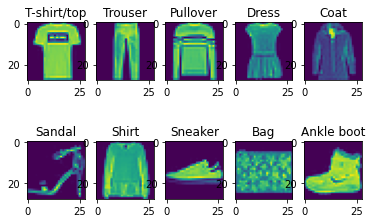

In [30]:
dress=["T-shirt/top", "Trouser","Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag","Ankle boot"]

wandb.init(project="assignment1")

#creating an array of images from the xtrain array where 1 image for each array is appended
unique=[]
for i in range(10):
  for j in range(len(train_class)):
    if train_class[j]==i:
      unique.append(train_data[j])
      break;
#printing the images of the array crated 
for i in range(len(unique)):
  plt.subplot(2,5,i+1)
  plt.imshow(unique[i])
  plt.title(dress[i])
wandb.run.name="Question-1"
wandb.log({"imagess":[wandb.Image(img,caption=item) for img,item in zip(unique,dress)]})
wandb.finish()

# Question 2


In [128]:
#train_data = train_data.reshape(train_data.shape[0], -1)
#test_data = test_data.reshape(test_data.shape[0], -1)
train_data = np.array(train_data)
train_data = train_data / 255.0
test_data = np.array(test_data)
test_data = test_data / 255.0
print(train_data.shape)
print(test_data.shape)


(60000, 28, 28)
(10000, 28, 28)


In [129]:
train_shape=train_data.shape[0]
test_shape=train_class.shape[0]


In [130]:
x_train, x_val, y_train, y_val = train_test_split(train_data, train_class, test_size=0.2, random_state=42)
y_tr=y_train

In [131]:

y_train_unencoded = y_train
#One hot encoding of the class labels
encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.expand_dims(y_train,1)).toarray()
y_val = encoder.fit_transform(np.expand_dims(y_val,1)).toarray()
y_test = encoder.fit_transform(np.expand_dims(test_class,1)).toarray()

In [9]:
class FeedForwardNeuralNetwork():
    def __init__(self,input_size,output_size,Y,hidden_layer=[128]):
        self.num_inputs=input_size
        self.num_outputs=output_size
        self.hidden_sizes=len(hidden_layer)
        self.hidden_layer=hidden_layer
        self.Weights = {}
        self.Biases = {}
        self.sizes=[self.num_inputs]+hidden_layer+[self.num_outputs]                 
            
    def sigmoid(self,z):
            return np.where(z>=0,1/(1+np.exp(-z)),(np.exp(z)/(1+np.exp(z))))
        
    def sigmoid_grad(self,z):
        return sigmoid(z)*sigmoid(1-z);
    
    def softmax(self,x):
        exps=np.exp(x)
        res=exps/(np.sum(exps))
        return res
    def grad_softmax(y_pred,truey):
            return y_pred-truey
    def relu(self,x):
        return np.maximum(0,x)
    def tanh(self,x):
        return np.tanh(x)
    def derivative_relu(self,x):
        if(x>0):
            return 1
        return 0
    def tanh(self,x):
        return np.tanh(x)
    def derivative_tanh(x):
        compute=np.tanh(x)**2
        return 1-compute
    def cross_entropy(self,True_Y,pred_Y):
        loss=np.multiply(True_Y,pred_Y)
        loss=loss[loss!=0]
        loss=np.mean(-np.log(loss))
        return loss
    def activation_function(self,name,x):
        if name=="Sigmoid":
            return np.where(z>=0,1/(1+np.exp(-z)),(np.exp(z)/(1+np.exp(z))))
        elif name=="relu":
            return np.maximum(0,x)
        elif name=="tanh":
            return np.tanh(x)
    def forward_propogation(self,activation,X):
        self.H={}
        self.H[0]=X.reshape(1,-1)
        self.A={}
        for i in range(self.hidden_sizes):
            self.A[i+1]=np.matmul(self.H[i],self.Weights[i+1])+self.Biases[i+1]
            self.H[i+1]=self.activation_function(activation,self.A[i+1])
        self.A[(self.hidden_sizes)+1]=np.matmul(self.H[(self.hidden_sizes)],self.Weights[(self.hidden_sizes)+1])+self.Biases[(self.hidden_sizes)+1]
        self.H[(self.hidden_sizes)+1]= self.softmax(self.A[len(self.hidden_layer)+1]) 
        return 
    def grad(self,x,y):
        self.forward_pass(x)
        self.dW={}
        self.dB={}
        self.dH={}
        self.dA={}
        L=self.hidden_sizes+1
        self.dA[L]=(self.H[L]-y)
        for k in range(L,0,-1):
            self.dW[k]=np.matmul(self.H[k-1].T,self.da[k])
            self.dB[k]=self.dA[k]
            self.dH[k-1]=np.matmul(self.dA[k],self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    def fit(self,activation,X,Y):
        Y_pred=[]
        for i in range(self.hidden_sizes+1):
            current=self.sizes[i]
            next_Layer=self.sizes[i+1]
            self.Weights[i+1] = np.random.randn(current, next_Layer)
            self.Biases[i+1] = np.zeros((1, next_Layer))
        
        for x,y in zip(X,Y):
            self.forward_propogation(activation,x)
            Y_pred.append(self.H[(self.hidden_sizes)+1][0])
        return Y_pred
        
        
    
    
    
    

In [ ]:
 def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 

In [10]:
#Sample implementation using 3 hidden layers of sizes 100, 256 and 512 respectively

model = FeedForwardNeuralNetwork(x_train.shape[1]*x_train.shape[1],y_train.shape[1],[100,256,512])
activation_name = "tanh"
class_predictions = model.fit(activation_name, x_train, y_train)

In [8]:
t=x_train.reshape(1,-1)

In [9]:
t.shape

(1, 37632000)

In [11]:
# Class probabilities for 0th indexed image

np.set_printoptions(suppress=True)
class_predictions[455]

array([0.        , 0.11779925, 0.        , 0.00005458, 0.00000001,
       0.80260927, 0.00000464, 0.        , 0.07953224, 0.        ])

# Question 3

In [12]:
def accuracy(y_true, y_pred):
    acc = np.sum(np.equal(y_true,y_pred))/y_true.shape[0]
    return acc

In [63]:
class NeuralNetworkBackProp():
    def __init__(self,input_size,output_size,Y,hidden_layer=[128]):
        self.num_inputs=input_size
        self.num_outputs=output_size
        self.hidden_sizes=len(hidden_layer)
        self.hidden_layer=hidden_layer
        self.Weights = {}
        self.Biases = {}
        self.sizes=[self.num_inputs]+hidden_layer+[self.num_outputs]                 
            
    def sigmoid(self,z):
            return np.where(z>=0,1/(1+np.exp(-z)),(np.exp(z)/(1+np.exp(z))))
        
    def sigmoid_grad(self,z):
        return z*(1-z);
    
    def softmax(self,x):
        exps=np.exp(x)
        res=exps/(np.sum(exps))
        return res
    def grad_softmax(y_pred,truey):
            return y_pred-truey
    def relu(self,x):
        return np.maximum(0,x)
    def tanh(self,x):
        return np.tanh(x)
    def derivative_relu(self,x):
        if(x>0):
            return 1
        return 0
    def tanh(self,x):
        return np.tanh(x)
    def derivative_tanh(x):
        compute=np.tanh(x)**2
        return 1-compute
    def cross_entropy(self,True_Y,pred_Y):
        loss=np.multiply(True_Y,pred_Y)
        loss=loss[loss!=0]
        loss=np.mean(-np.log(loss))
        return loss
    def activation_function(self,name,x):
        if name=="Sigmoid":
            return np.where(x>=0,1/(1+np.exp(-x)),(np.exp(x)/(1+np.exp(x))))
        elif name=="relu":
            return np.maximum(0,x)
        elif name=="tanh":
            return np.tanh(x)
    def forward_propogation(self,activation,X):
        self.H={}
        self.H[0]=X.reshape(1,-1)
        self.A={}
        for i in range(self.hidden_sizes):
            self.A[i+1]=np.matmul(self.H[i],self.Weights[i+1])+self.Biases[i+1]
            self.H[i+1]=self.activation_function(activation,self.A[i+1])
        self.A[(self.hidden_sizes)+1]=np.matmul(self.H[(self.hidden_sizes)],self.Weights[(self.hidden_sizes)+1])+self.Biases[(self.hidden_sizes)+1]
        self.H[(self.hidden_sizes)+1]= self.softmax(self.A[len(self.hidden_layer)+1]) 
        return 
    def grad(self,x,y,activation):
        self.forward_propogation(activation,x)
        self.dW={}
        self.dB={}
        self.dH={}
        self.dA={}
        L=self.hidden_sizes+1
        self.dA[L]=(self.H[L]-y)
        for k in range(L,0,-1):
            self.dW[k]=np.matmul(self.H[k-1].T,self.dA[k])
            self.dB[k]=self.dA[k]
            if(k!=0):
                self.dH[k-1]=np.matmul(self.dA[k],self.Weights[k].T)
                self.dA[k-1] = np.multiply(self.dH[k-1], self.sigmoid_grad(self.H[k-1]))
    def fit(self,activation,X,Y):
        Y_pred=[]
       
        for epoch in range(2):
            dWa={}
            dBa={}
            for i in range(self.hidden_sizes+1):
                current=self.sizes[i]
                next_Layer=self.sizes[i+1]
                self.Weights[i+1] = np.zeros((current, next_Layer))
                self.Biases[i+1] = np.zeros((1, next_Layer))
            for x,y in zip(X,Y):
                self.grad(x,y,activation)
                for i in range(self.hidden_sizes+1):
                    dWa[i+1]=dWa[i+1]+self.dW[i+1]
                    dBa[i+1]=dwa[i+1]+self.dB[i+1]
            m=X.shape[1]
            for i in range(self.hidden_sizes+1):
                self.Weights[i+1] -= learning_rate * (dWa[i+1]/m)
                self.Biases[i+1] -= learning_rate * (dBa[i+1]/m)
        
        
    
    
    
    

In [64]:
#Sample implementation using 3 hidden layers of sizes 100, 256 and 512 respectively

model = NeuralNetworkBackProp(x_train.shape[1]*x_train.shape[1],y_train.shape[1],[100,256,512])
activation_name = "Sigmoid"
class_predictions = model.fit(activation_name, x_train, y_train)

KeyError: 1

In [43]:
    def fit(self,activation,X,Y):
        Y_pred=[]
        for i in range(self.hidden_sizes+1):
            current=self.sizes[i]
            next_Layer=self.sizes[i+1]
            self.Weights[i+1] = np.random.randn(current, next_Layer)
            self.Biases[i+1] = np.zeros((1, next_Layer))
        
        for x,y in zip(X,Y):
            self.forward_propogation(activation,x)
            Y_pred.append(self.H[(self.hidden_sizes)+1][0])
        return Y_pred

NameError: name 'tqdm_notebook' is not defined

In [10]:
class NeuralNetworkBackProp():
    def __init__(self,input_size,output_size,Y,hidden_layer=[128]):
        self.num_inputs=input_size
        self.num_outputs=output_size
        self.hidden_sizes=len(hidden_layer)
        self.hidden_layer=hidden_layer
        self.Weights = {}
        self.Biases = {}
        self.sizes=[self.num_inputs]+hidden_layer+[self.num_outputs]                 
            
    def sigmoid(self,z):
            return np.where(z>=0,1/(1+np.exp(-z)),(np.exp(z)/(1+np.exp(z))))
        
    def sigmoid_grad(self,z):
        return z*(1-z);
    
    def softmax(self,x):
        exps=np.exp(x)
        res=exps/(np.sum(exps))
        return res
    def grad_softmax(y_pred,truey):
            return y_pred-truey
    def relu(self,x):
        return np.maximum(0,x)
    def tanh(self,x):
        return np.tanh(x)
    def derivative_relu(self,x):
        if(x>0):
            return 1
        return 0
    def tanh(self,x):
        return np.tanh(x)
    def derivative_tanh(x):
        compute=np.tanh(x)**2
        return 1-compute
    def cross_entropy(self,True_Y,pred_Y):
        loss=np.multiply(True_Y,pred_Y)
        loss=loss[loss!=0]
        loss=np.mean(-np.log(loss))
        return loss
    def activation_function(self,name,x):
        if name=="Sigmoid":
            return np.where(x>=0,1/(1+np.exp(-x)),(np.exp(x)/(1+np.exp(x))))
        elif name=="relu":
            return np.maximum(0,x)
        elif name=="tanh":
            return np.tanh(x)
    def forward_propogation(self,activation,X):
        self.H={}
        self.H[0]=X.reshape(1,-1)
        self.A={}
        for i in range(self.hidden_sizes):
            self.A[i+1]=np.matmul(self.H[i],self.Weights[i+1])+self.Biases[i+1]
            self.H[i+1]=self.activation_function(activation,self.A[i+1])
        self.A[(self.hidden_sizes)+1]=np.matmul(self.H[(self.hidden_sizes)],self.Weights[(self.hidden_sizes)+1])+self.Biases[(self.hidden_sizes)+1]
        self.H[(self.hidden_sizes)+1]= self.softmax(self.A[len(self.hidden_layer)+1]) 
        return 
    def grad(self,x,y,activation):
        self.forward_propogation(activation,x)
        self.dW={}
        self.dB={}
        self.dH={}
        self.dA={}
        L=self.hidden_sizes+1
        self.dA[L]=(self.H[L]-y)
        for k in range(L,0,-1):
            self.dW[k]=np.matmul(self.H[k-1].T,self.dA[k])
            self.dB[k]=self.dA[k]
            if(k!=0):
                self.dH[k-1]=np.matmul(self.dA[k],self.Weights[k].T)
                self.dA[k-1] = np.multiply(self.dH[k-1], self.sigmoid_grad(self.H[k-1]))
    def fit(self,activation,X,Y):
        Y_pred=[]
        dWa={}
        dBa={}
        for i in range(self.hidden_sizes+1):
            current=self.sizes[i]
            next_Layer=self.sizes[i+1]
            self.Weights[i+1] = np.random.randn(current, next_Layer)
            self.Biases[i+1] = np.zeros((1, next_Layer))
        for i in range(self.hidden_sizes+1):
            dWa[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
            dBa[i+1] = np.zeros((1, self.sizes[i+1]))
        for x,y in zip(X,Y):
            self.grad(x,y,activation)
            for i in range(self.hidden_sizes+1):
                dWa[i+1]=dWa[i+1]+self.dW[i+1]
                dBa[i+1]=dBa[i+1]+self.dB[i+1]
        m=X.shape[1]
        return Y_pred
        
    
    
    
    

In [11]:
#Sample implementation using 3 hidden layers of sizes 100, 256 and 512 respectively

model = NeuralNetworkBackProp(x_train.shape[1]*x_train.shape[1],y_train.shape[1],[100,256,512])
activation_name = "Sigmoid"
class_predictions = model.fit(activation_name, x_train, y_train)

In [30]:
class NeuralNetworkBackProp():
    def __init__(self,input_size,output_size,Y,hidden_layer=[128]):
        self.num_inputs=input_size
        self.num_outputs=output_size
        self.hidden_sizes=len(hidden_layer)
        self.hidden_layer=hidden_layer
        self.Weights = {}
        self.Biases = {}
        self.sizes=[self.num_inputs]+hidden_layer+[self.num_outputs]                 
            
    def sigmoid(self,z):
            return np.where(z>=0,1/(1+np.exp(-z)),(np.exp(z)/(1+np.exp(z))))
        
    def sigmoid_grad(self,z):
        return z*(1-z);
    
    def softmax(self,x):
        exps=np.exp(x)
        res=exps/(np.sum(exps))
        return res
    def grad_softmax(y_pred,truey):
            return y_pred-truey
    def relu(self,x):
        return np.maximum(0,x)
    def tanh(self,x):
        return np.tanh(x)
    def derivative_relu(self,x):
        if(x>0):
            return 1
        return 0
    def tanh(self,x):
        return np.tanh(x)
    def derivative_tanh(x):
        compute=np.tanh(x)**2
        return 1-compute
    def cross_entropy(self,True_Y,pred_Y):
        loss=np.multiply(True_Y,pred_Y)
        loss=loss[loss!=0]
        loss=np.mean(-np.log(loss))
        return loss
    def activation_function(self,name,x):
        if name=="Sigmoid":
            return np.where(x>=0,1/(1+np.exp(-x)),(np.exp(x)/(1+np.exp(x))))
        elif name=="relu":
            return np.maximum(0,x)
        elif name=="tanh":
            return np.tanh(x)
   # def forward_propogation(self,activation,X):
    #    self.H={}
    #    self.H[0]=X.reshape(1,-1)
    #    self.A={}
    #    for i in range(self.hidden_sizes):
    #        self.A[i+1]=np.matmul(self.H[i],self.Weights[i+1])+self.Biases[i+1]
    #        self.H[i+1]=self.activation_function(activation,self.A[i+1])
     #   self.A[(self.hidden_sizes)+1]=np.matmul(self.H[(self.hidden_sizes)],self.Weights[(self.hidden_sizes)+1])+self.Biases[(self.hidden_sizes)+1]
     ##   self.H[(self.hidden_sizes)+1]= self.softmax(self.A[len(self.hidden_layer)+1]) 
        return
    def forward_propagation(self,x,weights,bias,mthd):
        self.a={}
        self.h={}
        self.h[0]=x.reshape(1,-1)
        layers=len(weights)
        if mthd=='sigmoid':
            for i in range(layers-1):
                self.a[i+1]=np.matmul(self.h[i],weights[i+1])+bias[i+1]
                self.h[i+1]=self.sigmoid(self.a[i+1])
            self.a[layers]=np.matmul(self.h[layers-1],weights[layers])+bias[layers]
            self.h[layers]=self.softmax(self.a[layers])
        #return h[layers]
            return self.a,self.h
        elif mthd=='tanh':
            for i in range(layers-1):
                self.a[i+1]=np.matmul(self.h[i],weights[i+1])+bias[i+1]
                self.h[i+1]=self.tanh(self.a[i+1])
            self.a[layers]=np.matmul(self.h[layers-1],weights[layers])+bias[layers]
            self.h[layers]=self.softmax(self.a[layers])
        #return h[layers]
            return self.a,self.h
        elif mthd=='relu':
            for i in range(layers-1):
                self.a[i+1]=np.matmul(self.h[i],weights[i+1])+bias[i+1]
                self.h[i+1]=self.relu(self.a[i+1])
            self.a[layers]=np.matmul(self.h[layers-1],weights[layers])+bias[layers]
            self.h[layers]=self.softmax(self.a[layers])
        #return h[layers]
            return self.a,self.h
    def grad(self,x,y,activation):
        self.forward_propagation(x,self.Weights,self.Biases,activation)
        self.dW={}
        self.dB={}
        self.dH={}
        self.dA={}
        L=self.hidden_sizes+1
        self.dA[L]=(self.h[L]-y)
        for k in range(L,0,-1):
            self.dW[k]=np.matmul(self.h[k-1].T,self.dA[k])
            self.dB[k]=self.dA[k]
            if(k!=0):
                self.dH[k-1]=np.matmul(self.dA[k],self.Weights[k].T)
                self.dA[k-1] = np.multiply(self.dH[k-1], self.sigmoid_grad(self.h[k-1]))
    def fit(self,activation,X,Y):
        Y_pred=[]
        dWa={}
        dBa={}
        for i in range(self.hidden_sizes+1):
            current=self.sizes[i]
            next_Layer=self.sizes[i+1]
            self.Weights[i+1] = np.random.randn(current, next_Layer)
            self.Biases[i+1] = np.zeros((1, next_Layer))
        for i in range(self.hidden_sizes+1):
            dWa[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
            dBa[i+1] = np.zeros((1, self.sizes[i+1]))
        for x,y in zip(X,Y):
            self.grad(x,y,activation)
            for i in range(self.hidden_sizes+1):
                dWa[i+1]=dWa[i+1]+self.dW[i+1]
                dBa[i+1]=dBa[i+1]+self.dB[i+1]
        m=X.shape[1]
        return Y_pred
        
    
    
    
    

In [31]:
#Sample implementation using 3 hidden layers of sizes 100, 256 and 512 respectively

model = NeuralNetworkBackProp(x_train.shape[1]*x_train.shape[1],y_train.shape[1],[100,256,512])
activation_name = "sigmoid"
class_predictions = model.fit(activation_name, x_train, y_train)

In [33]:
#Forward Prop Implemented

In [51]:
class NeuralNetworkBackProp():
    def __init__(self,input_size,output_size,Y,hidden_layer=[128]):
        self.num_inputs=input_size
        self.num_outputs=output_size
        self.hidden_sizes=len(hidden_layer)
        self.hidden_layer=hidden_layer
        self.Weights = {}
        self.Biases = {}
        self.sizes=[self.num_inputs]+hidden_layer+[self.num_outputs]                 
            
    def sigmoid(self,z):
            return np.where(z>=0,1/(1+np.exp(-z)),(np.exp(z)/(1+np.exp(z))))
        
    def sigmoid_grad(self,z):
        return z*(1-z);
    
    def softmax(self,x):
        exps=np.exp(x)
        res=exps/(np.sum(exps))
        return res
    def grad_softmax(y_pred,truey):
            return y_pred-truey
    def relu(self,x):
        return np.maximum(0,x)
    def tanh(self,x):
        return np.tanh(x)
    def derivative_relu(self,x):
        if(x>0):
            return 1
        return 0
    def tanh(self,x):
        return np.tanh(x)
    def derivative_tanh(x):
        compute=np.tanh(x)**2
        return 1-compute
    def cross_entropy(self,True_Y,pred_Y):
        loss=np.multiply(True_Y,pred_Y)
        loss=loss[loss!=0]
        loss=np.mean(-np.log(loss))
        return loss
    def activation_function(self,name,x):
        if name=="Sigmoid":
            return np.where(x>=0,1/(1+np.exp(-x)),(np.exp(x)/(1+np.exp(x))))
        elif name=="relu":
            return np.maximum(0,x)
        elif name=="tanh":
            return np.tanh(x)
   # def forward_propogation(self,activation,X):
    #    self.H={}
    #    self.H[0]=X.reshape(1,-1)
    #    self.A={}
    #    for i in range(self.hidden_sizes):
    #        self.A[i+1]=np.matmul(self.H[i],self.Weights[i+1])+self.Biases[i+1]
    #        self.H[i+1]=self.activation_function(activation,self.A[i+1])
     #   self.A[(self.hidden_sizes)+1]=np.matmul(self.H[(self.hidden_sizes)],self.Weights[(self.hidden_sizes)+1])+self.Biases[(self.hidden_sizes)+1]
     ##   self.H[(self.hidden_sizes)+1]= self.softmax(self.A[len(self.hidden_layer)+1]) 
        return
    def forward_propagation(self,x,weights,bias,mthd):
        self.a={}
        self.h={}
        self.h[0]=x.reshape(1,-1)
        layers=len(weights)
        if mthd=='sigmoid':
            for i in range(layers-1):
                self.a[i+1]=np.matmul(self.h[i],weights[i+1])+bias[i+1]
                self.h[i+1]=self.sigmoid(self.a[i+1])
            self.a[layers]=np.matmul(self.h[layers-1],weights[layers])+bias[layers]
            self.h[layers]=self.softmax(self.a[layers])
        #return h[layers]
            return self.a,self.h
        elif mthd=='tanh':
            for i in range(layers-1):
                self.a[i+1]=np.matmul(self.h[i],weights[i+1])+bias[i+1]
                self.h[i+1]=self.tanh(self.a[i+1])
            self.a[layers]=np.matmul(self.h[layers-1],weights[layers])+bias[layers]
            self.h[layers]=self.softmax(self.a[layers])
        #return h[layers]
            return self.a,self.h
        elif mthd=='relu':
            for i in range(layers-1):
                self.a[i+1]=np.matmul(self.h[i],weights[i+1])+bias[i+1]
                self.h[i+1]=self.relu(self.a[i+1])
            self.a[layers]=np.matmul(self.h[layers-1],weights[layers])+bias[layers]
            self.h[layers]=self.softmax(self.a[layers])
        #return h[layers]
            return self.a,self.h
#    def grad(self,x,y,activation):
 #       self.forward_propagation(x,self.Weights,self.Biases,activation)
   #     self.dW={}
    #    self.dB={}
      #  self.dH={}
      #  self.dA={}
      #  L=self.hidden_sizes+1
       # self.dA[L]=(self.h[L]-y)
       # for k in range(L,0,-1):
       #     self.dW[k]=np.matmul(self.h[k-1].T,self.dA[k])
       #     self.dB[k]=self.dA[k]
        #    if(k!=0):
         #       self.dH[k-1]=np.matmul(self.dA[k],self.Weights[k].T)
         #       self.dA[k-1] = np.multiply(self.dH[k-1], self.sigmoid_grad(self.h[k-1]))
        

    def back_propagation(self,x,y,weights,bias,mthd):
        a,h=self.forward_propagation(x,self.Weights,self.Biases,mthd)
        self.dW={}
        self.dB={}
        self.dH={}
        self.dA={}
        layers=len(self.Weights)
        #y_label=[0]*10
        #y_label[y]=1
        #y_label=np.array(y_label).reshape(10,1)
        self.dA[layers]=self.h[layers]-y
        for i in range(layers,0,-1):
            self.dW[i]=np.matmul(h[i-1].T,self.dA[i])
            self.dB[i]=self.dA[i]
            self.dH[i-1]=np.matmul(self.dA[i],self.Weights[i].T)
            if mthd=='sigmoid':
                self.dA[i-1]=np.multiply(self.dH[i-1],self.sigmoid_grad(h[i-1]))
            elif mthd=='tanh':
                self.dA[i-1]=np.multiply(self.dH[i-1],self.derivative_tanh(h[i-1]))
            elif mthd=='relu':
                self.dA[i-1]=np.multiply(self.dH[i-1],self.derivative_relu(h[i-1]))
        return self.dW,self.dB    
     
    def fit(self,activation,X,Y):
        Y_pred=[]
        dWa={}
        dBa={}
        for i in range(self.hidden_sizes+1):
            current=self.sizes[i]
            next_Layer=self.sizes[i+1]
            self.Weights[i+1] = np.random.randn(current, next_Layer)
            self.Biases[i+1] = np.zeros((1, next_Layer))
        for i in range(self.hidden_sizes+1):
            dWa[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
            dBa[i+1] = np.zeros((1, self.sizes[i+1]))
        for x,y in zip(X,Y):
            self.back_propagation(x,y,self.Weights,self.Biases,activation)
            for i in range(self.hidden_sizes+1):
                dWa[i+1]=dWa[i+1]+self.dW[i+1]
                dBa[i+1]=dBa[i+1]+self.dB[i+1]
        m=X.shape[1]
        return Y_pred
        
    
    
    
    

In [52]:
#Sample implementation using 3 hidden layers of sizes 100, 256 and 512 respectively

model = NeuralNetworkBackProp(x_train.shape[1]*x_train.shape[1],y_train.shape[1],[100,256,512])
activation_name = "sigmoid"
class_predictions = model.fit(activation_name, x_train, y_train)

In [36]:


def back_propagation(x,y,weights,bias,mthd):
    a,h=forward_propagation(x.reshape(784,1),weights,bias,mthd)
    dW={}
    dB={}
    dH={}
    dA={}
    layers=len(weights)
    y_label=[0]*10
    y_label[y]=1
    y_label=np.array(y_label).reshape(10,1)
    dA[layers]=h[layers].reshape(10,1)-y_label
    for i in range(layers,0,-1):
        dW[i]=np.matmul(dA[i],h[i-1].T)
        dB[i]=dA[i]
        dH[i-1]=np.matmul(weights[i].T,dA[i])
        if mthd=='sigmoid':
            dA[i-1]=np.multiply(dH[i-1],sigmoid_dif(h[i-1]))
        elif mthd=='tanh':
            dA[i-1]=np.multiply(dH[i-1],tanh_dif(h[i-1]))
        elif mthd=='relu':
            dA[i-1]=np.multiply(dH[i-1],relu_dif(h[i-1]))
    return dW,dB    
     

In [97]:

def stochastic_gradient_descent(weights,bias,epochs,layers_size_list,train_images,train_labels,learning_rate,mthd,alpha=0,batch_size=10):
    for e in range(epochs):
        dw={}
        db={}
        ce_train=0
        ce_val=0
        num_point_seen=0
        for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
            dw[i+1]=np.zeros((y,x))
        for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
            db[i+1]=np.zeros((x,1))
        for j,k in zip(train_images[0:30000],train_labels[0:30000]):
            tdw,tdb=back_propagation(j,k,weights,bias,mthd)
            for l in range(len(layers_size_list)-1):
                dw[l+1]+=tdw[l+1]
                db[l+1]+=tdb[l+1]
            num_point_seen+=1
            if num_point_seen==batch_size:
                for z in range(len(layers_size_list)-1):
                    weights[z+1]=weights[z+1]-learning_rate*dw[z+1]/batch_size-learning_rate*alpha*weights[z+1]
                    bias[z+1]=bias[z+1]-learning_rate*db[z+1]/batch_size
                for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
                    dw[i+1]=np.zeros((y,x))
                for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
                    db[i+1]=np.zeros((x,1))
                num_point_seen=0
        res=[]
        for i in train_images[0:30000]:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res.append(h[len(weights)])
        y_pred=[]
        for i in res:
            j=list(i)
            temp=j.index(max(j))
            y_pred.append(temp)
        train_acc=accuracy_score(y_pred, train_labels[0:30000])

        res_test=[]
        for i in test_images:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res_test.append(h[len(weights)])
        '''for i in range(len(test_labels)):
            j=[0]*10
            j[test_labels[i]]=1
            ce_val+=cross_entropy(res_test[i],j)'''
        ce_train=log_loss(train_labels[0:30000],np.array(res).reshape((30000,10)))
        ce_val=log_loss(test_labels,np.array(res_test).reshape((10000,10)))

        test_acc=test_accuracy(weights,bias,test_images,test_labels,mthd)
    return weights,bias

In [143]:
class NeuralNetwork():
    def __init__(self,input_size,output_size,Y,hidden_layer=[128]):
        self.num_inputs=input_size
        self.num_outputs=output_size
        self.hidden_sizes=len(hidden_layer)
        self.hidden_layer=hidden_layer
        self.Weights = {}
        self.Biases = {}
        self.sizes=[self.num_inputs]+hidden_layer+[self.num_outputs]                 
            
    def sigmoid(self,z):
            return np.where(z>=0,1/(1+np.exp(-z)),(np.exp(z)/(1+np.exp(z))))
        
    def sigmoid_grad(self,z):
        return z*(1-z);
    
    def softmax(self,x):
        exps=np.exp(x)
        res=exps/(np.sum(exps))
        return res
    def grad_softmax(y_pred,truey):
            return y_pred-truey
    def relu(self,x):
        return np.maximum(0,x)
    def tanh(self,x):
        return np.tanh(x)
    def derivative_relu(self,x):
        if(x>0):
            return 1
        return 0
    def tanh(self,x):
        return np.tanh(x)
    def derivative_tanh(self,x):
        compute=np.tanh(x)**2
        return 1-compute
    def cross_entropy(self,True_Y,pred_Y):
        loss=np.multiply(True_Y,pred_Y)
        loss=loss[loss!=0]
        loss=np.mean(-np.log(loss))
        return loss
    def activation_function(self,name,x):
        if name=="Sigmoid":
            return np.where(x>=0,1/(1+np.exp(-x)),(np.exp(x)/(1+np.exp(x))))
        elif name=="relu":
            return np.maximum(0,x)
        elif name=="tanh":
            return np.tanh(x)
   # def forward_propogation(self,activation,X):
    #    self.H={}
    #    self.H[0]=X.reshape(1,-1)
    #    self.A={}
    #    for i in range(self.hidden_sizes):
    #        self.A[i+1]=np.matmul(self.H[i],self.Weights[i+1])+self.Biases[i+1]
    #        self.H[i+1]=self.activation_function(activation,self.A[i+1])
     #   self.A[(self.hidden_sizes)+1]=np.matmul(self.H[(self.hidden_sizes)],self.Weights[(self.hidden_sizes)+1])+self.Biases[(self.hidden_sizes)+1]
     ##   self.H[(self.hidden_sizes)+1]= self.softmax(self.A[len(self.hidden_layer)+1]) 
        return
    def forward_propagation(self,x,weights,bias,mthd):
        self.a={}
        self.h={}
        self.h[0]=x.reshape(1,-1)
        layers=len(weights)
        if mthd=='sigmoid':
            for i in range(layers-1):
                self.a[i+1]=np.matmul(self.h[i],weights[i+1])+bias[i+1]
                self.h[i+1]=self.sigmoid(self.a[i+1])
            self.a[layers]=np.matmul(self.h[layers-1],weights[layers])+bias[layers]
            self.h[layers]=self.softmax(self.a[layers])
        #return h[layers]
            return self.a,self.h
        elif mthd=='tanh':
            for i in range(layers-1):
                self.a[i+1]=np.matmul(self.h[i],weights[i+1])+bias[i+1]
                self.h[i+1]=self.tanh(self.a[i+1])
            self.a[layers]=np.matmul(self.h[layers-1],weights[layers])+bias[layers]
            self.h[layers]=self.softmax(self.a[layers])
        #return h[layers]
            return self.a,self.h
        elif mthd=='relu':
            for i in range(layers-1):
                self.a[i+1]=np.matmul(self.h[i],weights[i+1])+bias[i+1]
                self.h[i+1]=self.relu(self.a[i+1])
            self.a[layers]=np.matmul(self.h[layers-1],weights[layers])+bias[layers]
            self.h[layers]=self.softmax(self.a[layers])
        #return h[layers]
            return self.a,self.h
#    def grad(self,x,y,activation):
 #       self.forward_propagation(x,self.Weights,self.Biases,activation)
   #     self.dW={}
    #    self.dB={}
      #  self.dH={}
      #  self.dA={}
      #  L=self.hidden_sizes+1
       # self.dA[L]=(self.h[L]-y)
       # for k in range(L,0,-1):
       #     self.dW[k]=np.matmul(self.h[k-1].T,self.dA[k])
       #     self.dB[k]=self.dA[k]
        #    if(k!=0):
         #       self.dH[k-1]=np.matmul(self.dA[k],self.Weights[k].T)
         #       self.dA[k-1] = np.multiply(self.dH[k-1], self.sigmoid_grad(self.h[k-1]))
        

    def back_propagation(self,x,y,weights,bias,mthd):
        a,h=self.forward_propagation(x,self.Weights,self.Biases,mthd)
        self.dW={}
        self.dB={}
        self.dH={}
        self.dA={}
        layers=len(self.Weights)
        #y_label=[0]*10
        #y_label[y]=1
        #y_label=np.array(y_label).reshape(10,1)
        self.dA[layers]=self.h[layers]-y
        for i in range(layers,0,-1):
            self.dW[i]=np.matmul(h[i-1].T,self.dA[i])
            self.dB[i]=self.dA[i]
            self.dH[i-1]=np.matmul(self.dA[i],self.Weights[i].T)
            if mthd=='sigmoid':
                self.dA[i-1]=np.multiply(self.dH[i-1],self.sigmoid_grad(h[i-1]))
            elif mthd=='tanh':
                self.dA[i-1]=np.multiply(self.dH[i-1],self.derivative_tanh(h[i-1]))
            elif mthd=='relu':
                self.dA[i-1]=np.multiply(self.dH[i-1],self.derivative_relu(h[i-1]))
        return self.dW,self.dB    
     
    def fit(self,activation,X,Y,algo,y_tr):
        Y_pred=[]
        self.dWa={}
        self.dBa={}
        epochs=2
        learning_rate=0.01
        for e in range(epochs):

            if(algo=="GD"):
                for i in range(self.hidden_sizes+1):
                    current=self.sizes[i]
                    next_Layer=self.sizes[i+1]
                    self.Weights[i+1] = np.random.randn(current, next_Layer)
                    self.Biases[i+1] = np.zeros((1, next_Layer))
                for i in range(self.hidden_sizes+1):
                    self.dWa[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                    self.dBa[i+1] = np.zeros((1, self.sizes[i+1]))
                for x,y in zip(X,Y):
                    self.back_propagation(x,y,self.Weights,self.Biases,activation)
                    for i in range(self.hidden_sizes+1):
                        self.dWa[i+1]=self.dWa[i+1]+self.dW[i+1]
                        self.dBa[i+1]=self.dBa[i+1]+self.dB[i+1]
                m=X.shape[1]

                for i in range(self.hidden_sizes+1):
                    self.Weights[i+1] -= learning_rate * (self.dWa[i+1]/m)
                    self.Biases[i+1] -= learning_rate * (self.dBa[i+1]/m)

                res=[]
     
                for i in X[0:30000]:
                    a,h=self.forward_propagation(i,self.Weights,self.Biases,activation)
                    res.append(h[len(self.Weights)])
                y_pred=[]
                for i in res:
                    j=list(i)
                    temp=j.index(max(j))
                    y_pred.append(temp)
                train_acc=accuracy_score(y_pred, y_tr[0:30000])            
                print(train_acc)
            if(algo=="Momentum"):
                ce_train=0
                ce_val=0;
                prev_vw={}
                prev_vb={}
                v_w={}
                v_b={}
                for i in range(self.hidden_sizes+1):
                    current=self.sizes[i]
                    next_Layer=self.sizes[i+1]
                    self.Weights[i+1] = np.random.randn(current, next_Layer)
                    self.Biases[i+1] = np.zeros((1, next_Layer))
                for i in range(self.hidden_sizes+1):
                    dWa[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                    prev_vw[i+1]=np.zeros((self.sizes[i],self.sizes[i+1]))
                    v_w= np.zeros((self.sizes[i], self.sizes[i+1]))
                    v_b=np.zeros((1,self.sizes[i+1]))
                    prev_vb=np.zeros((1,self.sizes[i+1]))
                    dBa[i+1] = np.zeros((1, self.sizes[i+1]))   
                for x,y in zip(X,Y):
                    self.back_propagation(x,y,self.Weights,self.Biases,activation)
                    for i in range(self.hidden_sizes+1):
                        dWa[i+1]=dWa[i+1]+self.dW[i+1]
                        dBa[i+1]=dBa[i+1]+self.dB[i+1]
                v_w={}
                v_b={}
                gamma=0.9
                learning_rate=0.1
                alpha=0.1
                for i in range(self.hidden_sizes-1):
                    v_w[i+1]=gamma*prev_vw[i+1]+learning_rate*dWa[i+1]#/m
                    v_b[i+1]=gamma*prev_vb[i+1]+learning_rate*dBa[i+1]#/m
                    self.Weights[i+1]=self.Weights[i+1]-v_w[i+1]-learning_rate*alpha*self.Weights[i+1] #this is l2 regularisation
                    self.Biases[i+1]=self.Biases[i+1]-v_b[i+1]
                    prev_vw[i+1]=v_w[i+1]
                    prev_vb[i+1]=v_b[i+1]
                res=[]
     
                for i in X[0:30000]:
                    a,h=self.forward_propagation(i,self.Weights,self.Biases,activation)
                    res.append(h[len(self.Weights)])
                y_pred=[]
                for i in res:
                    j=list(i)
                    temp=j.index(max(j))
                    y_pred.append(temp)
                train_acc=accuracy_score(y_pred, y_tr[0:30000])            
                print(train_acc)
    
    
    
    

In [145]:
#Sample implementation using 3 hidden layers of sizes 100, 256 and 512 respectively

model = NeuralNetwork(x_train.shape[1]*x_train.shape[1],y_train.shape[1],[256,512,512])
activation_name = "tanh"
class_predictions = model.fit(activation_name, x_train, y_train,"GD",y_tr)

0.0987
0.0987


In [ ]:
def momentum_gradient_descent(weights,bias,epochs,layers_size_list,train_images,train_labels,learning_rate,mthd,alpha=0):
    for e in range(epochs):
        dw={}
        db={}
        prev_vw={}
        prev_vb={}
        ce_train=0
        ce_val=0
        for i,x,y in zip(range(len(layers_size_list)-1),layers_size_list[:-1],layers_size_list[1:]):
            dw[i+1]=np.zeros((y,x))
            prev_vw[i+1]=np.zeros((y,x))
        for i,x in zip(range(len(layers_size_list)-1),layers_size_list[1:]):
            db[i+1]=np.zeros((x,1))
            prev_vb[i+1]=np.zeros((x,1))
        for j,k in zip(train_images[0:30000],train_labels[0:30000]):
            tdw,tdb=back_propagation(j,k,weights,bias,mthd)
            for l in range(len(layers_size_list)-1):
                dw[l+1]+=tdw[l+1]
                db[l+1]+=tdb[l+1]
        m=len(train_images[0:30000])
        v_w={}
        v_b={}
        gamma=0.9
        for i in range(len(layers_size_list)-1):
            v_w[i+1]=gamma*prev_vw[i+1]+learning_rate*dw[i+1]#/m
            v_b[i+1]=gamma*prev_vb[i+1]+learning_rate*db[i+1]#/m
            weights[i+1]=weights[i+1]-v_w[i+1]-learning_rate*alpha*weights[i+1] #this is l2 regularisation
            bias[i+1]=bias[i+1]-v_b[i+1]
            prev_vw[i+1]=v_w[i+1]
            prev_vb[i+1]=v_b[i+1]
        res=[]
        for i in train_images[0:30000]:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res.append(h[len(weights)])
        y_pred=[]
        for i in res:
            j=list(i)
            temp=j.index(max(j))
            y_pred.append(temp)
        train_acc=accuracy_score(y_pred, train_labels[0:30000])
        #the below code is for calculating cross entropy
        '''for i in range(len(train_labels[0:30000])):
            j=[0]*10
            j[train_labels[i]]=1
            ce_train+=cross_entropy(res[i],j)'''
        res_test=[]
        for i in test_images:
            a,h=forward_propagation(i.reshape(784,1),weights,bias,mthd)
            res_test.append(h[len(weights)])
        '''for i in range(len(test_labels)):
            j=[0]*10
            j[test_labels[i]]=1
            ce_val+=cross_entropy(res_test[i],j)
            #mse1+=mse(res[i],j)'''
        ce_train=log_loss(train_labels[0:30000],np.array(res).reshape((30000,10)))
        ce_val=log_loss(test_labels,np.array(res_test).reshape((10000,10)))
        #print("CE-loss:",ce/len(train_labels[0:30000]))
        #print("MSE-loss:",mse1/len(train_labels[0:30000]))
        #if((e+1)%100==0):
        #print(e,":",train_acc)
        test_acc=test_accuracy(weights,bias,test_images,test_labels,mthd)
    return weights,bias